In [7]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.knns import KNNBasic
import matplotlib.pyplot as plt

file_path = 'ratings_small.csv'
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)


In [3]:
# 1) Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF),
#    User-based Collaborative Filtering, Item-based Collaborative Filtering,
#    under the 5-folds cross-validation
models = [
    SVD(),  # Probabilistic Matrix Factorization
    KNNBasic(sim_options={'user_based': True}),  # User-based Collaborative Filtering
    KNNBasic(sim_options={'user_based': False}),  # Item-based Collaborative Filtering
]

metrics = ['mae', 'rmse']
for model in models:
    print(f'\nModel: {model.__class__.__name__}')
    results = cross_validate(model, data, measures=metrics, cv=5, verbose=True)
    
    for metric in metrics:
        average_metric = sum(results[f'test_{metric}']) / 5
        print(f'Average {metric}: {average_metric}')


Model: SVD
Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6899  0.6933  0.6908  0.6878  0.6892  0.6902  0.0018  
RMSE (testset)    0.8988  0.8991  0.8984  0.8941  0.8940  0.8969  0.0023  
Fit time          1.05    0.96    0.96    1.15    0.94    1.01    0.08    
Test time         0.08    0.08    0.18    0.08    0.08    0.10    0.04    
Average mae: 0.6902038394362514
Average rmse: 0.8968870328457573

Model: KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fol

In [4]:
# 2) Compare the average (mean) performances of User-based collaborative filtering,
#    item-based collaborative filtering, PMF with respect to RMSE and MAE.
#    Which ML model is the best in the movie rating data?
results_dict = {'model_type': [], 'mae': [], 'rmse': []}
for model in models:
    if isinstance(model, SVD):
        model_type = 'PMF'
    elif(model.sim_options['user_based']):
        model_type = 'User'
    else: model_type = 'Item'
    print('\n'+model_type)
    
    results = cross_validate(model, data, measures=metrics, cv=5, verbose=True)
    
    for metric in metrics:
        average_metric = sum(results[f'test_{metric}']) / 5
        results_dict['model_type'].append(model_type)
        results_dict[metric].append(average_metric)
print('\n')
for key, values in results_dict.items():
    print(f"{key}: {values}")

print("\nComparison of Average Performances:")
model_types=['PMF','User','Item']

for metric in metrics:
    print(f"\nAverage {metric}:")
    for i in range(len(models)):
        model_type = results_dict['model_type'][2*i]
        metric_value = results_dict[metric][i]
        print(f"{model_type}: {metric_value}")
        

# Identify the best model based on RMSE and MAE
best_rmse_model = results_dict['model_type'][results_dict['rmse'].index(min(results_dict['rmse']))]
best_mae_model = results_dict['model_type'][results_dict['mae'].index(min(results_dict['mae']))]

print(f"\nBest model based on RMSE: {best_rmse_model}")
print(f"Best model based on MAE: {best_mae_model}")


PMF
Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6921  0.6926  0.6917  0.6886  0.6874  0.6905  0.0021  
RMSE (testset)    0.8988  0.9011  0.8977  0.8949  0.8910  0.8967  0.0035  
Fit time          1.45    1.18    1.16    1.03    1.03    1.17    0.15    
Test time         0.18    0.10    0.09    0.16    0.09    0.12    0.04    

User
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7497  0.7361  0.7436  0.7450  0.7431  0.7

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7627  0.7706  0.7670  0.7719  0.7666  0.7678  0.0032  
RMSE (testset)    0.9880  0.9949  0.9938  1.0028  0.9902  0.9940  0.0051  
Fit time          0.38    0.39    0.39    0.39    0.39    0.39    0.00    
Test time         1.16    0.88    0.93    1.04    0.94    0.99    0.10    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

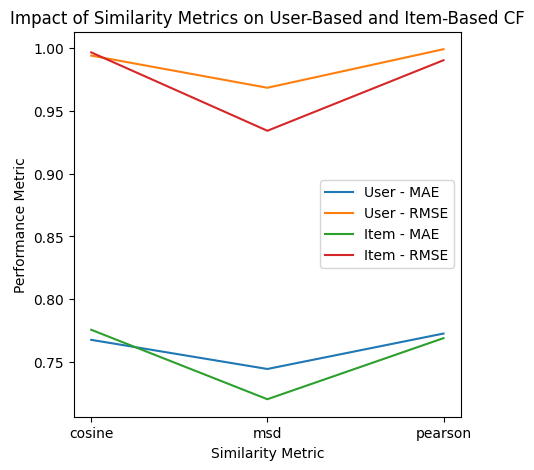

In [8]:
# 3) Examine how the cosine, MSD, and Pearson similarities impact the performances
#    of User-based Collaborative Filtering and Item-based Collaborative Filtering.
#    Plot your results.

similarity_metrics = ['cosine', 'msd', 'pearson']
models = ['user', 'item']

results_dict = {}

for model_type in models:
    results_dict[model_type] = {'mae': [], 'rmse': []}
    
    for sim_metric in similarity_metrics:
        model = KNNBasic(k=40, sim_options={'name': sim_metric, 'user_based': model_type == 'user'})
        results = cross_validate(model, data, measures=['mae', 'rmse'], cv=5, verbose=True)
        
        for metric in ['mae', 'rmse']:
            average_metric = sum(results[f'test_{metric}']) / 5
            results_dict[model_type][metric].append(average_metric)

# Plot the results
plt.figure(figsize=(5, 5))

for model_type in models:
    plt.plot(similarity_metrics, results_dict[model_type]['mae'], label=f'{model_type.capitalize()} - MAE')
    plt.plot(similarity_metrics, results_dict[model_type]['rmse'], label=f'{model_type.capitalize()} - RMSE')

plt.title('Impact of Similarity Metrics on User-Based and Item-Based CF')
plt.xlabel('Similarity Metric')
plt.ylabel('Performance Metric')
plt.legend()
plt.show()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7556  0.7484  0.7518  0.7585  0.7577  0.7544  0.0038  
RMSE (testset)    0.9854  0.9789  0.9840  0.9891  0.9889  0.9853  0.0037  
Fit time          0.15    0.24    0.22    0.20    0.19    0.20    0.03    
Test time         0.97    0.88    0.78    0.80    0.71    0.83    0.09    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

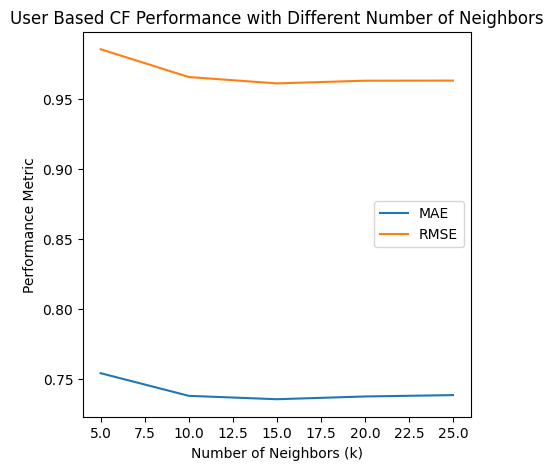

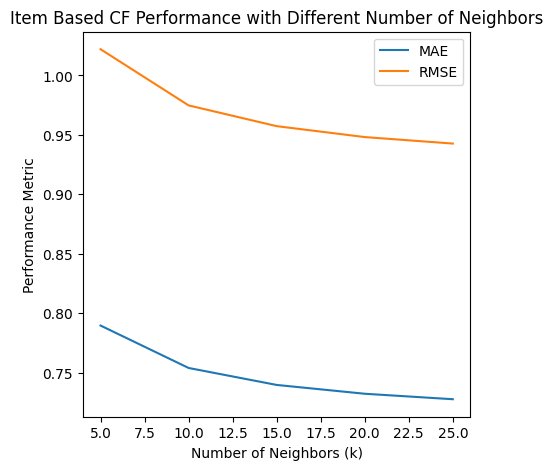

In [9]:
# 4) Examine how the number of neighbors impacts the performances
#    of User-based Collaborative Filtering and Item-based Collaborative Filtering.
#    Plot your results.


neighbor_values = [5, 10, 15, 20, 25]
results_dict = {'user': {'mae': [], 'rmse': []}, 'item': {'mae': [], 'rmse': []}}

for model_type in ['user', 'item']:
    for k in neighbor_values:
        model = KNNBasic(k=k, sim_options={'user_based': model_type == 'user'})
        results = cross_validate(model, data, measures=['mae', 'rmse'], cv=5, verbose=True)
        for metric in metrics:
            average_metric = sum(results[f'test_{metric}']) / 5
            results_dict[model_type][metric].append(average_metric)

# Plot the results
for model_type in ['user', 'item']:
    plt.figure(figsize=(5, 5))
    plt.plot(neighbor_values, results_dict[model_type]['mae'], label='MAE')
    plt.plot(neighbor_values, results_dict[model_type]['rmse'], label='RMSE')
    plt.title(f'{model_type.capitalize()} Based CF Performance with Different Number of Neighbors')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Performance Metric')
    plt.legend()
    plt.show()

In [10]:
# 5) Identify the best number of neighbors (denoted by K) for User/Item-based
#    collaborative filtering in terms of RMSE.
best_k_user = neighbor_values[results_dict['user']['rmse'].index(min(results_dict['user']['rmse']))]
best_k_item = neighbor_values[results_dict['item']['rmse'].index(min(results_dict['item']['rmse']))]

print(results_dict)
print(f"\nBest number of neighbors (K) for User-based CF: {best_k_user}")
print(f"Best number of neighbors (K) for Item-based CF: {best_k_item}")


{'user': {'mae': [0.7543864996399576, 0.7382430214569587, 0.7358338297222464, 0.7377935587323957, 0.7387686417310527], 'rmse': [0.9852655431231788, 0.9654503624408628, 0.960912038942136, 0.9628350963752743, 0.9629118680717381]}, 'item': {'mae': [0.7896980765514152, 0.7540330570348401, 0.7397671019845264, 0.7323596573840314, 0.7277611136765559], 'rmse': [1.022030001473802, 0.974800295824043, 0.9573500331570429, 0.9481644995510747, 0.9427074110070752]}}

Best number of neighbors (K) for User-based CF: 15
Best number of neighbors (K) for Item-based CF: 25
